In [1]:
import pandas as pd

In [5]:
df_train = pd.read_pickle('songs_train_preprocessed.pkl')
df_test = pd.read_pickle('songs_test_preprocessed.pkl')
print('train shape:', df_train.shape)
print('test shape:', df_test.shape)

train shape: (7307, 7)
test shape: (808, 7)


In [3]:
df_train.head()

,title,artist,year,views,url,lyric,tokens
0,Untitled,Rex Orange County,2017,292064,https://genius.com/Rex-Orange-County-Untitled-...,so if for any reason theres some miscommunicat...,"[reason, there, miscommunication, lying, face,..."
1,Dandelions,Ruth B.,2017,587288,https://genius.com/Ruth-B-Dandelions-lyrics,maybe its the way you say my name\nmaybe its t...,"[maybe, way, say, name, maybe, way, play, game..."
2,I Like,G Herbo,2017,204698,https://genius.com/G-Herbo-I-Like-lyrics,pull up in a new gwag\nsky blue body paint soo...,"[pull, new, gwag, sky, blue, body, paint, soow..."
3,Kiss Me,Ed Sheeran,2011,434377,https://genius.com/Ed-Sheeran-Kiss-Me-lyrics,yeah ive been feelin everything\nfrom hate to ...,"[yeah, ive, feelin, everything, hate, love, lo..."
4,I Say A Little Prayer,Aretha Franklin,1968,401893,https://genius.com/Aretha-Franklin-I-Say-A-Lit...,i say a little prayer for you\nthe moment i wa...,"[say, little, prayer, moment, wake, put, makeu..."


In [4]:
df_test.head()

,title,artist,year,views,url,lyric,tokens
0,BTS - Your eyes tell English Translation,Genius English Translations,2020,574010,https://genius.com/Genius-English-Translations...,verse jung kook\nv\n\nwhy are my eyes filled ...,"[verse, jung, kook, eye, filled, tear, hey, st..."
1,Superman,Eminem,2002,4716120,https://genius.com/Eminem-Superman-lyrics,dina rae\nthey call me superman\nleap tall hoe...,"[dina, rae, call, superman, leap, tall, hoe, s..."
2,Pussy Money Weed,Lil Wayne,2007,392937,https://genius.com/Lil-Wayne-Pussy-Money-Weed-...,oh yes i love her like egyptian\nshes poison a...,"[yes, love, like, egyptian, shes, poison, mich..."
3,Therefore I Am,Billie Eilish,2020,1712636,https://genius.com/Billie-Eilish-Therefore-I-A...,im not your friend\nor anything damn\nyou thin...,"[friend, anything, damn, think, youre, man, th..."
4,Renegade,Big Red Machine,2021,404770,https://genius.com/Big-Red-Machine-Renegade-ly...,i tapped on your window on your darkest night\...,"[tapped, window, darkest, night, really, gon, ..."


Vector Representation

In [6]:
from sentence_transformers import SentenceTransformer

In [8]:
df = df_train.copy()
df = df[['title', 'tokens']]
df.head()

,title,tokens
0,Untitled,"[reason, there, miscommunication, lying, face,..."
1,Dandelions,"[maybe, way, say, name, maybe, way, play, game..."
2,I Like,"[pull, new, gwag, sky, blue, body, paint, soow..."
3,Kiss Me,"[yeah, ive, feelin, everything, hate, love, lo..."
4,I Say A Little Prayer,"[say, little, prayer, moment, wake, put, makeu..."


In [9]:
df['lyrics_text'] = df['tokens'].apply(lambda tokens: " ".join(tokens))

In [10]:
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(df['lyrics_text'].tolist(), convert_to_numpy=True)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Agglomerative

In [28]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=10)  # Auto-detect clusters
df['cluster'] = clustering.fit_predict(embeddings)

In [29]:
df[['title', 'cluster']].head()

,title,cluster
0,Untitled,5
1,Dandelions,1
2,I Like,4
3,Kiss Me,0
4,I Say A Little Prayer,5


In [30]:
df['cluster'].nunique()

10

In [31]:
df['cluster'].value_counts()

cluster
2    1225
3     937
1     882
0     868
6     858
5     684
8     664
4     498
7     413
9     278
Name: count, dtype: int64

In [32]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
embeddings_2d = tsne.fit_transform(embeddings)

df['tsne_x'] = embeddings_2d[:, 0]
df['tsne_y'] = embeddings_2d[:, 1]

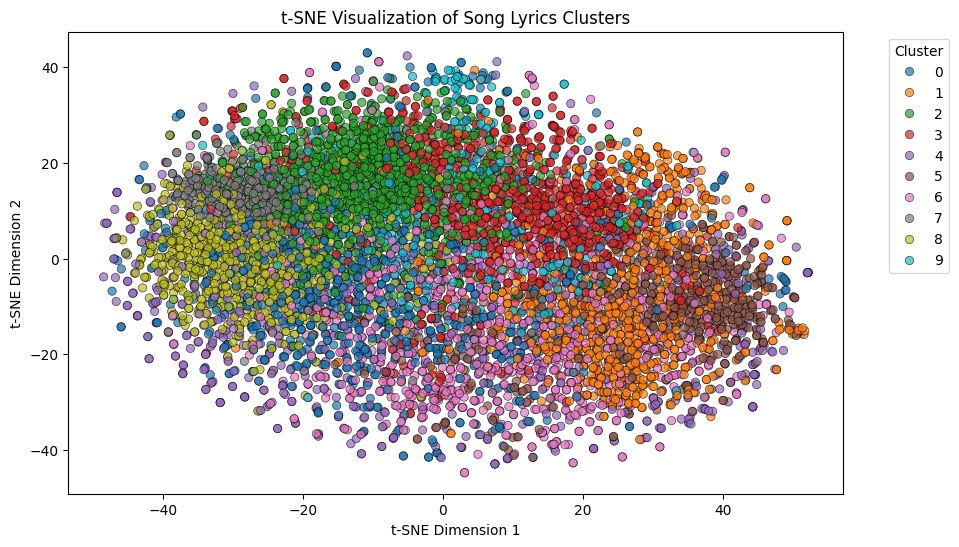

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['tsne_x'], y=df['tsne_y'], hue=df['cluster'], palette='tab10', alpha=0.7, edgecolor='k')
plt.title("t-SNE Visualization of Song Lyrics Clusters")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

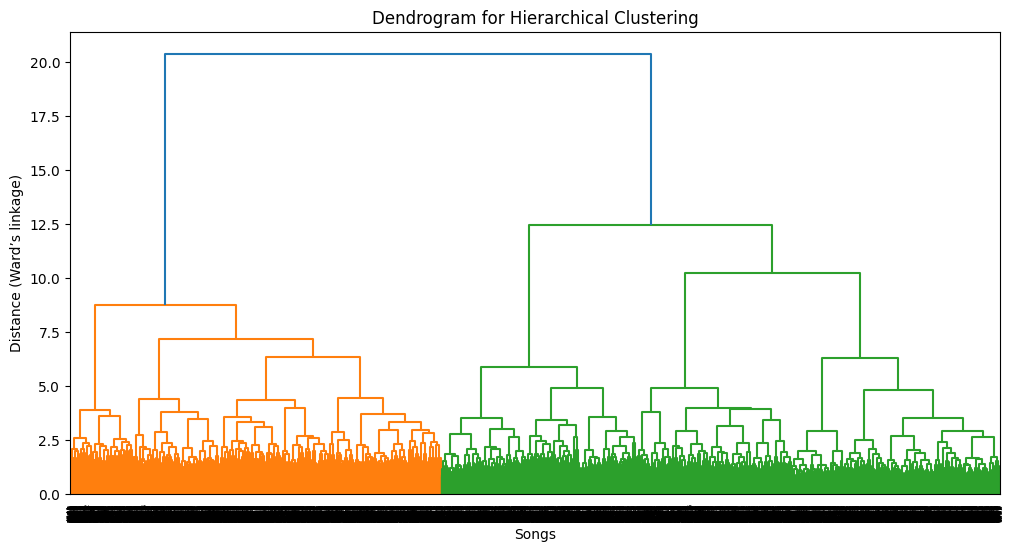

In [34]:
import scipy.cluster.hierarchy as sch

linkage_matrix = sch.linkage(embeddings, method='ward')

plt.figure(figsize=(12, 6))
sch.dendrogram(linkage_matrix, truncate_mode='level', p=20)  # Show only the last 20 merges
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Songs")
plt.ylabel("Distance (Ward’s linkage)")
plt.show()